# PCA on Crowdedness at Gym data

*This notebook is inpired by a [Kaggle notebook](https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn)*  

In this noteboo, we are applying **Principal component analysi**s on the [crowdedensss Gym dataset from Kaggle](https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym) using Scikit-learn and find out the dimensions(also known as components) with maximum variance(where the data is spread out).  
Features with little variance in the data are then projected into new lower dimension.  

Then the models are  trained on transformed dataset to apply machine learning models. 
We will finally apply Random forest Regressor on both the Old and the transformed datasets to compare them.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

MNISTonly0_1.csv
gym-data.csv
heart.csv



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('data/gym-data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.shape

(62184, 11)

In [5]:
# remove date
df = df.drop('date', axis=1)

In [6]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [7]:
X = df.iloc[:,1:8]  # all the features and no label
y = df.iloc[:, 0]  # label only (first column: number_people)
X
y

0        37
1        45
2        40
3        44
4        45
         ..
62179    23
62180    21
62181    25
62182    18
62183    23
Name: number_people, Length: 62184, dtype: int64

Compute Pairwise correlation of the features

In [8]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

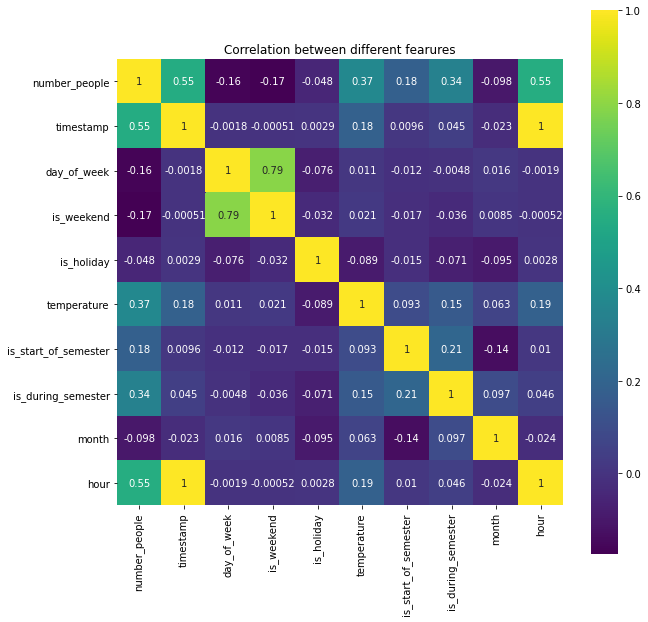

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

#### Standardising data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use `StandardScaler` to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.  
If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the [effects of not standardizing your data](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

In [10]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63654993,  0.50956119, -0.6280507 , ...,  2.09027384,
        -0.29253482, -1.39393832],
       [ 0.68623792,  0.50956119, -0.6280507 , ...,  2.09027384,
        -0.29253482, -1.39393832],
       [ 0.71106127,  0.50956119, -0.6280507 , ...,  2.09027384,
        -0.29253482, -1.39393832],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, ..., -0.292433  ,
        -0.29253482,  0.71739186],
       [ 0.96515979,  1.01036016,  1.59222814, ..., -0.292433  ,
        -0.29253482,  0.71739186],
       [ 0.99010704,  1.01036016,  1.59222814, ..., -0.292433  ,
        -0.29253482,  0.71739186]])

#### Apply PCA (without specifying the # of components)

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.0358806 , -0.48666187, -1.81424321, ...,  0.19423672,
         1.7452435 ,  0.87750703],
       [-0.03601716, -0.50358608, -1.84922418, ...,  0.17183603,
         1.72642302,  0.87742222],
       [-0.03608538, -0.51204115, -1.86670012, ...,  0.160645  ,
         1.7170206 ,  0.87737984],
       ...,
       [-1.81501988, -0.40713446, -0.40274896, ..., -0.06854136,
        -1.09859421, -0.43860086],
       [-1.81508878, -0.41567394, -0.42039937, ..., -0.07984411,
        -1.1080905 , -0.43864366],
       [-1.81515734, -0.42417122, -0.43796255, ..., -0.09109101,
        -1.11753985, -0.43868624]])

In [12]:
pca.get_covariance()

array([[ 1.00001608e+00, -1.79321968e-03, -5.08815704e-04,
         2.85078360e-03,  1.84852463e-01,  9.55105884e-03,
         4.46766172e-02],
       [-1.79321968e-03,  1.00001608e+00,  7.91350923e-01,
        -7.58632581e-02,  1.11689106e-02, -1.17822146e-02,
        -4.82370614e-03],
       [-5.08815704e-04,  7.91350923e-01,  1.00001608e+00,
        -3.18993471e-02,  2.06736733e-02, -1.66460432e-02,
        -3.61277725e-02],
       [ 2.85078360e-03, -7.58632581e-02, -3.18993471e-02,
         1.00001608e+00, -8.85280154e-02, -1.48581472e-02,
        -7.07995743e-02],
       [ 1.84852463e-01,  1.11689106e-02,  2.06736733e-02,
        -8.85280154e-02,  1.00001608e+00,  9.32433629e-02,
         1.52478347e-01],
       [ 9.55105884e-03, -1.17822146e-02, -1.66460432e-02,
        -1.48581472e-02,  9.32433629e-02,  1.00001608e+00,
         2.09865473e-01],
       [ 4.46766172e-02, -4.82370614e-03, -3.61277725e-02,
        -7.07995743e-02,  1.52478347e-01,  2.09865473e-01,
         1.0000160

In [13]:
# Percentage of variance explained by each of the selected components.
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.25724101, 0.19763625, 0.15230994, 0.14118937, 0.11201237,
       0.11008089, 0.02953017])

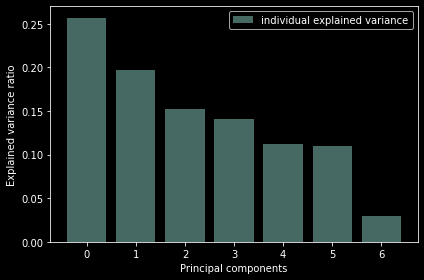

In [14]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**Thus we can see from the above plot that  first two components constitute almost 45% of the variance.Third,fourth and fifth components has 40% of the data sprad. The last component has less than 5% of the variance - hence we can drop the fifth component  **

#### Apply PCA (specifying the # of components: 5)

In [15]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[-0.0358806 , -0.48666187, -1.81424321, -0.27664803,  0.19423672],
       [-0.03601716, -0.50358608, -1.84922418, -0.26651035,  0.17183603],
       [-0.03608538, -0.51204115, -1.86670012, -0.26144572,  0.160645  ],
       ...,
       [-1.81501988, -0.40713446, -0.40274896,  0.31916911, -0.06854136],
       [-1.81508878, -0.41567394, -0.42039937,  0.3242843 , -0.07984411],
       [-1.81515734, -0.42417122, -0.43796255,  0.32937421, -0.09109101]])

In [16]:
pca.get_covariance()

array([[ 9.59568337e-01, -6.08116179e-03,  6.99946047e-04,
         8.94220460e-03,  2.48932252e-01,  4.55162044e-02,
        -2.09838388e-02],
       [-6.08116179e-03,  1.14053567e+00,  6.50843510e-01,
        -6.75316435e-02,  2.10879699e-02, -7.92066422e-03,
        -1.68670408e-02],
       [ 6.99946047e-04,  6.50843510e-01,  1.14027773e+00,
        -3.97487775e-02,  1.56403476e-02, -1.77695444e-02,
        -2.90952031e-02],
       [ 8.94220460e-03, -6.75316435e-02, -3.97487775e-02,
         9.99517744e-01, -9.80079974e-02, -2.02718283e-02,
        -6.11882231e-02],
       [ 2.48932252e-01,  2.10879699e-02,  1.56403476e-02,
        -9.80079974e-02,  8.98566272e-01,  3.62662637e-02,
         2.56388959e-01],
       [ 4.55162044e-02, -7.92066422e-03, -1.77695444e-02,
        -2.02718283e-02,  3.62662637e-02,  9.68036771e-01,
         2.68247385e-01],
       [-2.09838388e-02, -1.68670408e-02, -2.90952031e-02,
        -6.11882231e-02,  2.56388959e-01,  2.68247385e-01,
         8.9361005

In [17]:
# Percentage of variance explained by each of the selected components.
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.25724101, 0.19763625, 0.15230994, 0.14118937, 0.11201237])

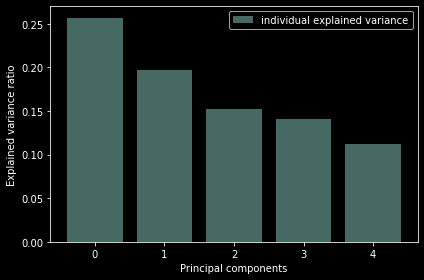

In [18]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [19]:
# Split data into training and test datasets using the ORIGINAL dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 7)

#### Fit Random Forest and compare the model with both datasets

In [20]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [21]:
%%time
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.8726047874874479, 0.8808714899844294, 0.8850414773263046, 0.8858057827482295, 0.8867047476030588, 0.8875126340980063, 0.886743896724092, 0.8873531418673153, 0.8863420885218648, 0.8879189619848311, 0.8867613891728664, 0.888036507860038, 0.8877371515445099, 0.8871482418731137, 0.8879545619420093, 0.8873057533630078, 0.8876065893036194, 0.8874928670162054, 0.8876078844906832]
CPU times: user 3min 22s, sys: 4.82 s, total: 3min 27s
Wall time: 3min 52s


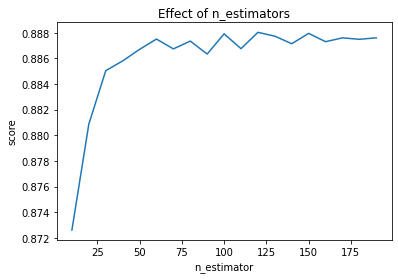

In [22]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [23]:
# Spit data into training and test datasets using the NEW dataset composed of the 5 principal components
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

(49747, 5)

In [24]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [25]:
%%time
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

[0.7980594206481251, 0.8118241754597315, 0.8116021383983821, 0.8147013368425323, 0.8177143002072462, 0.8161901538303951, 0.817694673625229, 0.8195088938002458, 0.8194962972058242, 0.8188599692635931, 0.8181283020336939, 0.8188530689395952, 0.8193616433368337, 0.8195788527184686, 0.8194250436107664, 0.8195717365842343, 0.8202581119536382, 0.8197276072829691, 0.8190340611897657]
CPU times: user 7min 41s, sys: 8.31 s, total: 7min 50s
Wall time: 10min 57s


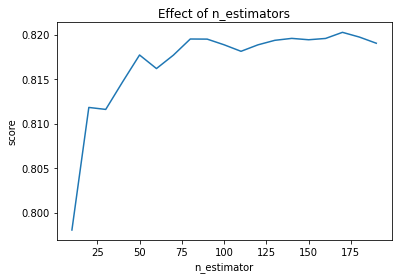

In [26]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

We can see the 2nd model performs decently well reaching ~82% even though it works of a educed set of features (5 principal components), and compared to the first model that reached ~88.8%.